In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('Base_117.csv')

In [14]:
df.columns

Index(['Connid', 'Poliza', 'Telefono', 'ID_UNICO', 'Intento', 'Created',
       'Calificacion', 'Tipificacion', 'SubTipificacion'],
      dtype='object')

In [15]:
df['Calificacion'].fillna('NO CALIFICADO', inplace=True)
contacto_efectivo = df[df['Calificacion']=='CONTACTO EFECTIVO']
pivot_table_intentos = pd.pivot_table(df[df['Intento']!=0], values= 'Connid', 
                                      index='Calificacion', columns='Intento', 
                                      aggfunc='count', fill_value=0, dropna=False)
total_llamadas_intento = pivot_table_intentos.sum(axis=0)
pivot_porcentajes = pd.pivot_table(contacto_efectivo, values='Connid', index='Calificacion'
                                   , columns='Intento',
                                   aggfunc='count', fill_value=0)
percen_intentos = (pivot_porcentajes/total_llamadas_intento)*100 

percents_filtred = percen_intentos[percen_intentos.index.get_level_values('Calificacion') != 'NO CALIFICADO']

por_format = percents_filtred.applymap(lambda x: f'{x: .2f}%')
print(por_format)

Intento                  1        2       3
Calificacion                               
CONTACTO EFECTIVO   21.37%   13.55%   6.53%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


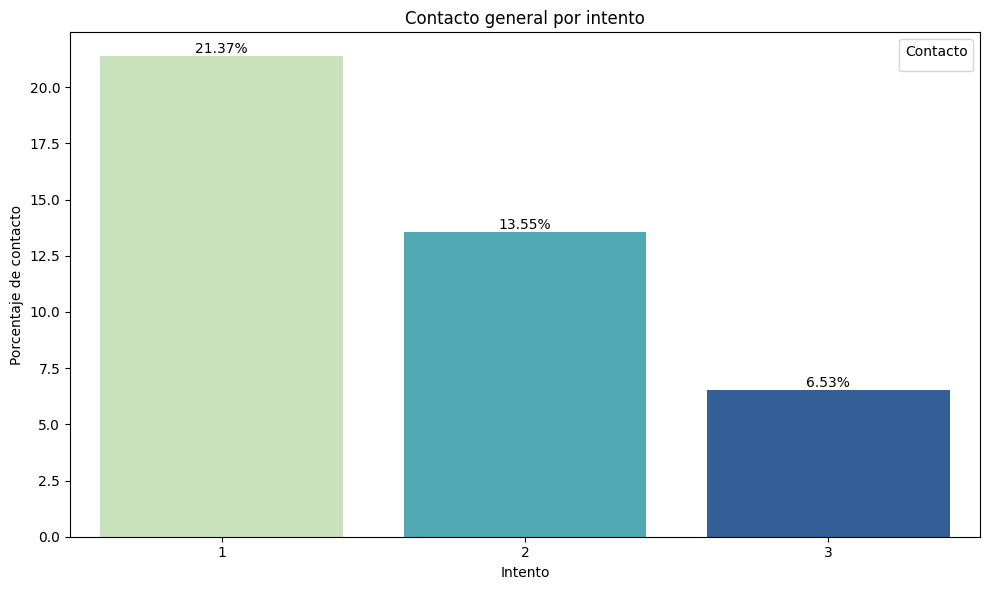

In [5]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = percents_filtred, palette="YlGnBu")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Contacto general por intento')
plt.xlabel('Intento')
plt.ylabel('Porcentaje de contacto')
plt.xticks(rotation=0)
plt.legend(title='Contacto')

plt.tight_layout()
plt.show()

Intento             1        2        3
Tipificacion                           
NO EFECTIVO    60.26%   57.78%   73.68%
NO PAGO        34.62%   33.33%   21.05%
PAGO            5.13%    8.89%    5.26%


Text(95.72222222222221, 0.5, 'Tipificacion')

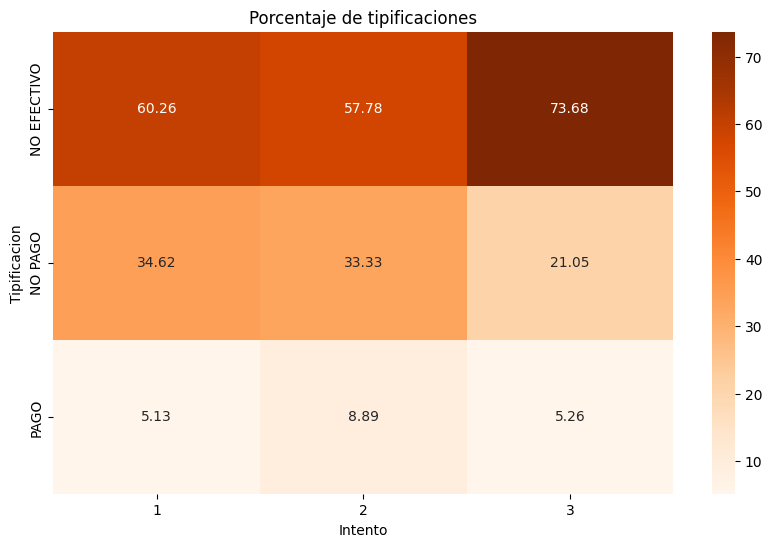

In [16]:
pivot_table_tipificaciones = pd.pivot_table(contacto_efectivo, values='Connid', index='Tipificacion', columns='Intento', aggfunc='count', fill_value=0 )
total_llamadas_intento_2 = pivot_table_tipificaciones.sum()
porcentaje_tipificaciones = (pivot_table_tipificaciones / total_llamadas_intento_2)*100
por_format_2 = porcentaje_tipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_2)
plt.figure(figsize=(10,6))
sns.heatmap(porcentaje_tipificaciones, annot=True, fmt=".2f", cmap="Oranges")
plt.title('Porcentaje de tipificaciones')
plt.xlabel('Intento')
plt.ylabel('Tipificacion')

Intento                  1        2        3
SubTipificacion                             
CONTESTA Y CUELGA   61.70%   61.54%   71.43%
ILOCALIZABLE         6.38%    7.69%    7.14%
NUMERO EQUIVOCADO   31.91%   30.77%   21.43%


Text(50.7222222222222, 0.5, 'Subtipificacion')

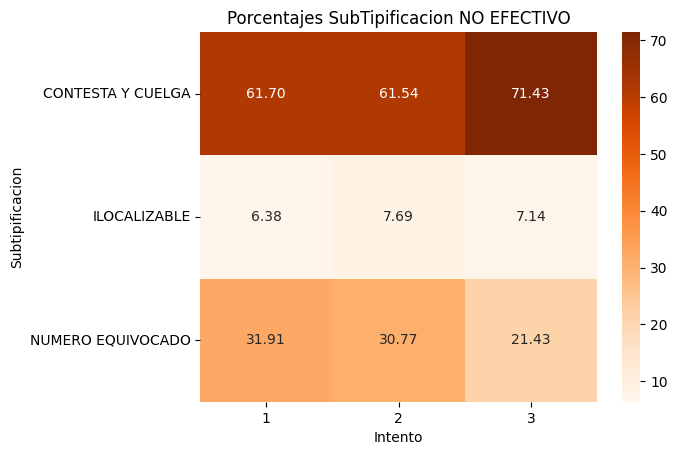

In [17]:
no_efectivo = df[df['Tipificacion']== 'NO EFECTIVO']
pivot_table_subtipificaciones = pd.pivot_table(no_efectivo, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_3 = pivot_table_subtipificaciones.sum()
porcen_subtipificaciones = (pivot_table_subtipificaciones/total_llamadas_intento_3)*100
por_format_3 = porcen_subtipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_3)
plt.title('Porcentajes SubTipificacion NO EFECTIVO')
sns.heatmap(porcen_subtipificaciones, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intento')
plt.ylabel('Subtipificacion')

Intento                                                   1        2         3
SubTipificacion                                                               
ASEGURADO INDICA QUE SU PÓLIZA YA ESTÁ EN PROCE...    3.70%    6.67%     0.00%
ASEGURADO NO QUISO PROPORCIONAR CANDADOS DE SEG...    3.70%    0.00%     0.00%
ASEGURADO SOLICITA HABLAR PRIMERO CON SU AGENTE       3.70%    0.00%     0.00%
ASEGURADO SOLICITA QUE LE LLAMEMOS DESPUÉS           70.37%   86.67%   100.00%
LA PERSONA QUE CONTESTA NO DESEA QUE LE VUELVAN...   14.81%    0.00%     0.00%
POLIZA YA PAGADA AL MOMENTO DE LA LLAMADA             3.70%    6.67%     0.00%


Text(49.722222222222186, 0.5, 'Subtipificacion')

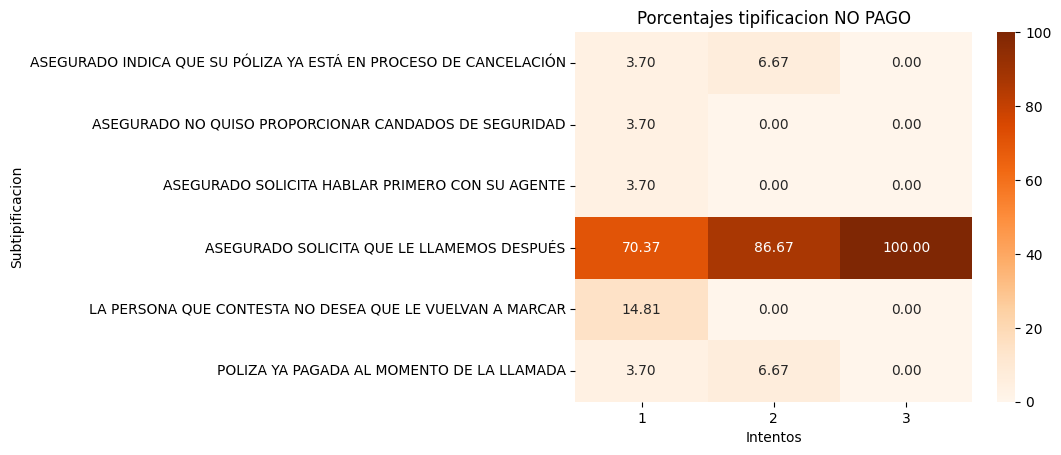

In [18]:
no_pago = df[df['Tipificacion']== 'NO PAGO']
pivot_table_subtipificaciones_1 = pd.pivot_table(no_pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_4 = pivot_table_subtipificaciones_1.sum()
porcen_subtipificaciones_1 = (pivot_table_subtipificaciones_1/total_llamadas_intento_4)*100
por_format_4 = porcen_subtipificaciones_1.applymap(lambda x: f'{x: .2f}%')
print(por_format_4)
plt.title('Porcentajes tipificacion NO PAGO')
sns.heatmap(porcen_subtipificaciones_1, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')

Intento                                   1        2         3
SubTipificacion                                               
PROMESA DE PAGO EN BANCO             25.00%   25.00%     0.00%
PROMESA DE PAGO POR PORTAL METLIFE   75.00%   75.00%   100.00%


Text(50.7222222222222, 0.5, 'Subtipificacion')

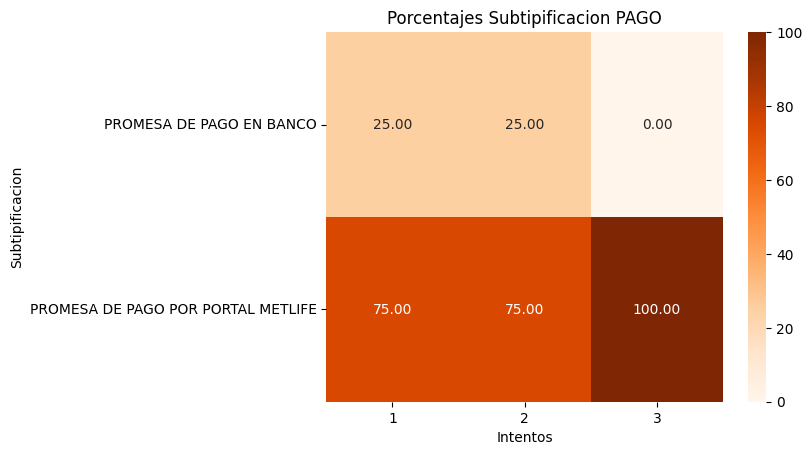

In [19]:
pago = df[df['Tipificacion']== 'PAGO']
pivot_table_subtipificaciones_2 = pd.pivot_table(pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_5 = pivot_table_subtipificaciones_2.sum()
porcen_subtipificaciones_2 = (pivot_table_subtipificaciones_2/total_llamadas_intento_5)*100
por_format_5 = porcen_subtipificaciones_2.applymap(lambda x: f'{x: .2f}%')
print(por_format_5)
plt.title('Porcentajes Subtipificacion PAGO')
sns.heatmap(porcen_subtipificaciones_2, annot=True, fmt='.2f', cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')

In [20]:
df['Created'] = pd.to_datetime(df['Created'])
df['Hora'] = df['Created'].dt.hour
df['Dia'] = df['Created'].dt.strftime('%A')



contacto_efectivo = df[df['Calificacion'] == 'CONTACTO EFECTIVO']

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data = df.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
contacto_efectivo_data = contacto_efectivo.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados = pd.merge(aggregated_data, contacto_efectivo_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados['Porcentaje Contacto'] = (resultados['Calificacion_Contacto'] / resultados['Calificacion_Total']) * 100

# Muestra los resultados
resultados.head(5)

,Hora,Dia,Calificacion_Total,Calificacion_Contacto,Porcentaje Contacto
0,9,Friday,7,3,42.857143
1,10,Friday,464,87,18.750000
2,10,Monday,211,33,15.639810
3,14,Monday,291,19,6.529210


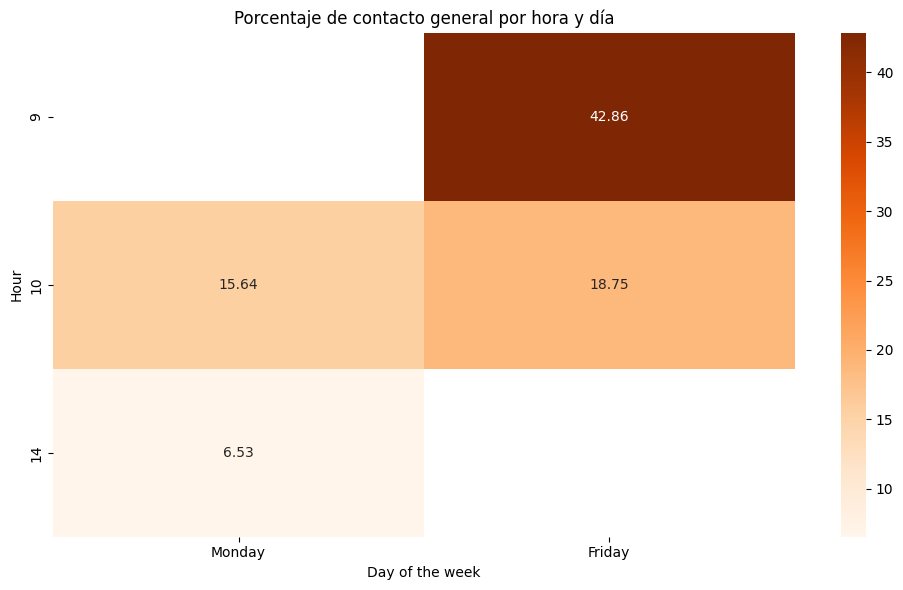

In [23]:
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table = resultados.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table = pivot_table[['Monday','Friday']]

# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('Porcentaje de contacto general por hora y día')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

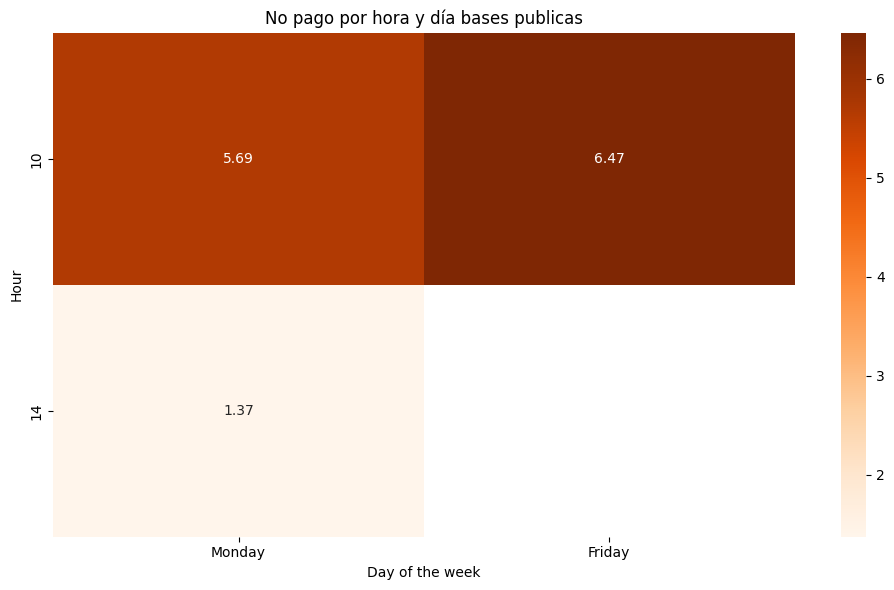

In [24]:
no_pago = df[(df['Calificacion'] == 'CONTACTO EFECTIVO') & (df['Tipificacion']=='NO PAGO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_2 = df.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
no_pago_data = no_pago.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_no_pago = pd.merge(aggregated_data_2, no_pago_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_no_pago['Porcentaje Contacto'] = (resultados_no_pago['Calificacion_Contacto'] / resultados_no_pago['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_2 = resultados_no_pago.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_2 = pivot_table_2[['Monday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_2, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('No pago por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

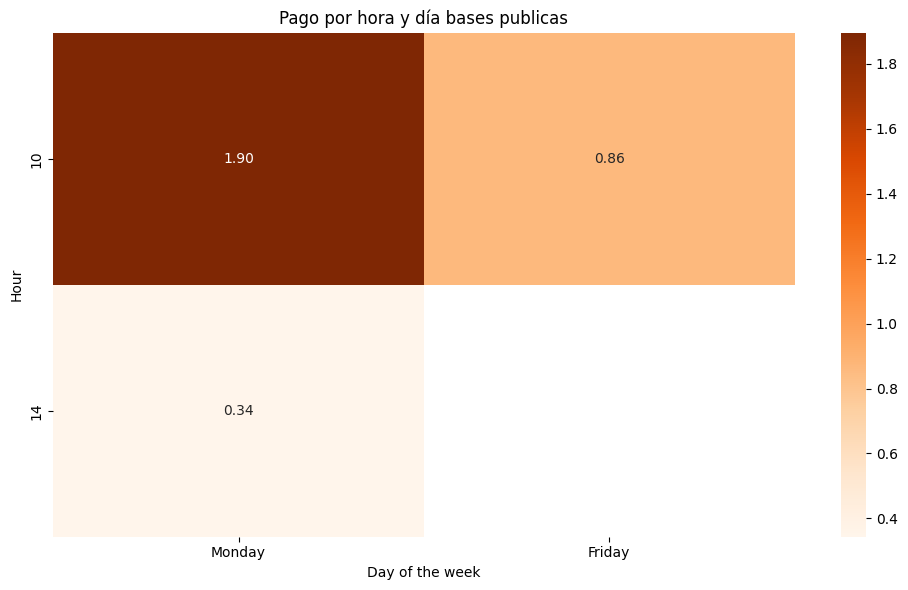

In [25]:
pago = df[(df['Calificacion'] == 'CONTACTO EFECTIVO') & (df['Tipificacion']=='PAGO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_3 = df.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
pago_data = pago.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_pago = pd.merge(aggregated_data_3, pago_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_pago['Porcentaje Contacto'] = (resultados_pago['Calificacion_Contacto'] / resultados_pago['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_3 = resultados_pago.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_3 = pivot_table_3[['Monday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_3, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('Pago por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

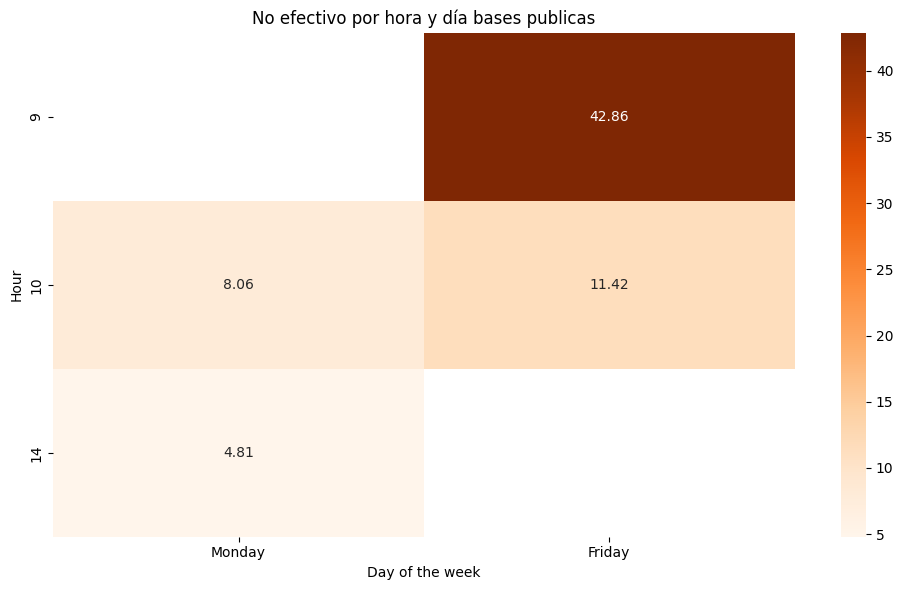

In [26]:
no_efe = df[(df['Calificacion'] == 'CONTACTO EFECTIVO') & (df['Tipificacion']=='NO EFECTIVO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_4 = df.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
no_efe_data = no_efe.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_no_efe = pd.merge(aggregated_data_4, no_efe_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_no_efe['Porcentaje Contacto'] = (resultados_no_efe['Calificacion_Contacto'] / resultados_no_efe['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_4 = resultados_no_efe.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_4 = pivot_table_4[['Monday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_4, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('No efectivo por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()